<a href="https://colab.research.google.com/github/CoolJunho/board/blob/master/240425_%EB%82%A0%EC%94%A8%26%EB%B0%9C%EC%A0%84%EB%9F%89_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Package

In [ ]:
import pandas as pd
import numpy as np
import os
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('mode.chained_assignment',  None)  # DataFrame 복사에 따른 경고문 무시

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# Read CSV

In [ ]:
sl_dir_path = '/content/drive/Shareddrives/SCS_SW/09. EMS/Data/smartlogger/24.04.16-04.22/'

In [ ]:
weather_dir_path = '/content/drive/Shareddrives/SCS_SW/09. EMS/Data/weather data/24.04.16~04.22_세종시_분 단위/processing data (5min)/'

In [ ]:
sl_file_name_list = []

files = os.listdir(sl_dir_path)

for file in files:
  if '.csv' in file:
    sl_file_name_list.append(file)

sl_file_name_list

['min240417.csv',
 'min240418.csv',
 'min240416.csv',
 'min240421.csv',
 'min240420.csv',
 'min240422.csv',
 'min240419.csv']

In [ ]:
weather_file_name_list = []

files = os.listdir(weather_dir_path)

for file in files:
  if '.csv' in file:
    weather_file_name_list.append(file)

weather_file_name_list

['24.04.16_세종시 날씨 데이터_5분 단위.csv',
 '24.04.21_세종시 날씨 데이터_5분 단위.csv',
 '24.04.20_세종시 날씨 데이터_5분 단위.csv',
 '24.04.18_세종시 날씨 데이터_5분 단위.csv',
 '24.04.22_세종시 날씨 데이터_5분 단위.csv',
 '24.04.17_세종시 날씨 데이터_5분 단위.csv',
 '24.04.19_세종시 날씨 데이터_5분 단위.csv']

In [ ]:
df_name_list = []

for i in sl_file_name_list:
  df_name = re.sub('min2404', '', i)
  df_name = re.sub('.csv', '', df_name)

  df_name_list.append(df_name)

df_name_list

['17', '18', '16', '21', '20', '22', '19']

In [ ]:
sl_dic = {}

for i, j in zip(df_name_list, sl_file_name_list):
  sl_dic[i] = pd.read_csv(sl_dir_path + j, header=2, skiprows=2)

In [ ]:
sl_dic = {}

for i, j in zip(df_name_list, sl_file_name_list):
  sl_dic[i] = pd.read_csv(sl_dir_path + j, header=2, sep=';')

In [ ]:
sl_dic['16'].head()

,#Time,Upv1,Upv2,Upv3,Upv4,Upv5,Upv6,Upv7,Upv8,Upv9,...,Error,Temp,cos,fac,Pac,Qac,Eac,E-Day,E-Total,Cycle Time
24-04-16 19:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.3,0.0,0.0,0.0,0.0,0.0,12.95,165.63,5,NaN
24-04-16 19:15:00,161.6,161.6,33.7,33.7,33.3,33.3,33.7,33.7,33.5,33.5,...,25.4,0.0,60.0,0.0,0.0,0.0,12.95,165.63,5,NaN
24-04-16 19:10:00,161.6,161.6,33.7,33.7,33.3,33.3,33.7,33.7,33.5,33.5,...,25.6,0.0,60.0,0.0,0.0,0.0,12.95,165.63,5,NaN
24-04-16 19:05:00,161.6,161.6,33.7,33.7,33.3,33.3,33.7,33.7,33.5,33.5,...,25.8,0.0,60.0,0.0,0.0,0.0,12.95,165.63,5,NaN
24-04-16 19:00:00,161.6,161.6,33.7,33.7,33.3,33.3,33.7,33.7,33.5,33.5,...,26.0,0.0,60.0,0.0,0.0,0.0,12.95,165.63,5,NaN


- index 이슈로 인해 columns가 한 칸씩 밀리는 현상 발생

In [ ]:
sl_df_col_name = list(sl_dic['16'].columns)

In [ ]:
for i in sl_dic.keys():
  sl_dic[str(i)].reset_index(drop=False, inplace=True)

In [ ]:
sl_dic['16'].head()

,index,#Time,Upv1,Upv2,Upv3,Upv4,Upv5,Upv6,Upv7,Upv8,...,Error,Temp,cos,fac,Pac,Qac,Eac,E-Day,E-Total,Cycle Time
0,24-04-16 19:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.3,0.0,0.0,0.0,0.0,0.0,12.95,165.63,5,NaN
1,24-04-16 19:15:00,161.6,161.6,33.7,33.7,33.3,33.3,33.7,33.7,33.5,...,25.4,0.0,60.0,0.0,0.0,0.0,12.95,165.63,5,NaN
2,24-04-16 19:10:00,161.6,161.6,33.7,33.7,33.3,33.3,33.7,33.7,33.5,...,25.6,0.0,60.0,0.0,0.0,0.0,12.95,165.63,5,NaN
3,24-04-16 19:05:00,161.6,161.6,33.7,33.7,33.3,33.3,33.7,33.7,33.5,...,25.8,0.0,60.0,0.0,0.0,0.0,12.95,165.63,5,NaN
4,24-04-16 19:00:00,161.6,161.6,33.7,33.7,33.3,33.3,33.7,33.7,33.5,...,26.0,0.0,60.0,0.0,0.0,0.0,12.95,165.63,5,NaN


In [ ]:
sl_df_col_name.append('None')

In [ ]:
for i in sl_dic.keys():
  sl_dic[str(i)].columns = sl_df_col_name
  sl_dic[str(i)] = sl_dic[str(i)].drop('None', axis=1)

In [ ]:
sl_dic['16'].head()

,#Time,Upv1,Upv2,Upv3,Upv4,Upv5,Upv6,Upv7,Upv8,Upv9,...,Error,Temp,cos,fac,Pac,Qac,Eac,E-Day,E-Total,Cycle Time
0,24-04-16 19:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,25.3,0.0,0.0,0.0,0.0,0.0,12.95,165.63,5
1,24-04-16 19:15:00,161.6,161.6,33.7,33.7,33.3,33.3,33.7,33.7,33.5,...,0,25.4,0.0,60.0,0.0,0.0,0.0,12.95,165.63,5
2,24-04-16 19:10:00,161.6,161.6,33.7,33.7,33.3,33.3,33.7,33.7,33.5,...,0,25.6,0.0,60.0,0.0,0.0,0.0,12.95,165.63,5
3,24-04-16 19:05:00,161.6,161.6,33.7,33.7,33.3,33.3,33.7,33.7,33.5,...,0,25.8,0.0,60.0,0.0,0.0,0.0,12.95,165.63,5
4,24-04-16 19:00:00,161.6,161.6,33.7,33.7,33.3,33.3,33.7,33.7,33.5,...,0,26.0,0.0,60.0,0.0,0.0,0.0,12.95,165.63,5


In [ ]:
weather_name_list = []

for i in weather_file_name_list:
  df_name = re.sub('24.04.', '', i)
  df_name = re.sub('_세종시 날씨 데이터_5분 단위', '', df_name)
  df_name = re.sub('.csv', '', df_name)

  weather_name_list.append(df_name)

weather_name_list

['16', '21', '20', '18', '22', '17', '19']

In [ ]:
weather_dic = {}

for i, j in zip(weather_name_list, weather_file_name_list):
  weather_dic[i] = pd.read_csv(weather_dir_path + j, index_col=0)

In [ ]:
weather_dic['16']

,지점,지점명,일시,기온(°C),누적강수량(mm),풍속(m/s),습도(%),누적일사(MJ/m^2),일사량,강수량,시간
0,239,세종,2024-04-16 00:05:00,12.8,0.0,0.7,92.0,0.00,0.0,0.0,00:05:00
1,239,세종,2024-04-16 00:10:00,12.8,0.0,1.8,92.4,0.00,0.0,0.0,00:10:00
2,239,세종,2024-04-16 00:15:00,12.8,0.0,1.1,92.6,0.00,0.0,0.0,00:15:00
3,239,세종,2024-04-16 00:20:00,12.8,0.0,1.0,92.7,0.00,0.0,0.0,00:20:00
4,239,세종,2024-04-16 00:25:00,12.7,0.0,1.9,92.4,0.00,0.0,0.0,00:25:00
...,...,...,...,...,...,...,...,...,...,...,...
283,239,세종,2024-04-16 23:40:00,10.1,2.0,1.6,83.8,18.72,0.0,0.0,23:40:00
284,239,세종,2024-04-16 23:45:00,10.1,2.0,0.9,85.2,18.72,0.0,0.0,23:45:00
285,239,세종,2024-04-16 23:50:00,10.1,2.0,0.1,85.3,18.72,0.0,0.0,23:50:00
286,239,세종,2024-04-16 23:55:00,9.9,2.0,0.4,85.2,18.72,0.0,0.0,23:55:00


# Sort Smart Logger Dataframe
- Smart Logger data의 시간은 내림차순이기 때문에 오름차순으로 변환 필요

In [ ]:
for i in sl_dic.keys():
  sl_dic[i]['시간'] = pd.to_datetime(sl_dic[i]['#Time']).dt.time

<ipython-input-22-b0be7bf412a6>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sl_dic[i]['시간'] = pd.to_datetime(sl_dic[i]['#Time']).dt.time
<ipython-input-22-b0be7bf412a6>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sl_dic[i]['시간'] = pd.to_datetime(sl_dic[i]['#Time']).dt.time
<ipython-input-22-b0be7bf412a6>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sl_dic[i]['시간'] = pd.to_datetime(sl_dic[i]['#Time']).dt.time
<ipython-input-22-b0be7bf412a6>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure

In [ ]:
# for i in sl_dic.keys():
#   sl_dic[i]['#Time'] = pd.to_datetime(sl_dic[i]['#Time'])
#   sl_dic[i]['시간'] = sl_dic[i]['#Time'].dt.time

In [ ]:
sl_dic['16'].head()

,#Time,Upv1,Upv2,Upv3,Upv4,Upv5,Upv6,Upv7,Upv8,Upv9,...,Temp,cos,fac,Pac,Qac,Eac,E-Day,E-Total,Cycle Time,시간
0,24-04-16 19:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.3,0.0,0.0,0.0,0.0,0.0,12.95,165.63,5,19:20:00
1,24-04-16 19:15:00,161.6,161.6,33.7,33.7,33.3,33.3,33.7,33.7,33.5,...,25.4,0.0,60.0,0.0,0.0,0.0,12.95,165.63,5,19:15:00
2,24-04-16 19:10:00,161.6,161.6,33.7,33.7,33.3,33.3,33.7,33.7,33.5,...,25.6,0.0,60.0,0.0,0.0,0.0,12.95,165.63,5,19:10:00
3,24-04-16 19:05:00,161.6,161.6,33.7,33.7,33.3,33.3,33.7,33.7,33.5,...,25.8,0.0,60.0,0.0,0.0,0.0,12.95,165.63,5,19:05:00
4,24-04-16 19:00:00,161.6,161.6,33.7,33.7,33.3,33.3,33.7,33.7,33.5,...,26.0,0.0,60.0,0.0,0.0,0.0,12.95,165.63,5,19:00:00


In [ ]:
for i in sl_dic.keys():
  sl_dic[i].sort_values(by=['#Time'], axis=0, ascending=True, inplace=True)
  sl_dic[i].reset_index(drop=True, inplace=True)

In [ ]:
sl_dic['16'].head()

,#Time,Upv1,Upv2,Upv3,Upv4,Upv5,Upv6,Upv7,Upv8,Upv9,...,Temp,cos,fac,Pac,Qac,Eac,E-Day,E-Total,Cycle Time,시간
0,24-04-16 14:35:00,260.7,260.7,103.3,103.3,102.3,102.3,100.9,100.9,102.4,...,25.8,1.0,60.04,2.054,0.000,0.15,10.33,163.01,875,14:35:00
1,24-04-16 14:40:00,266.5,266.5,103.3,103.3,102.3,102.3,100.9,100.9,102.4,...,27.0,1.0,60.03,1.916,0.001,0.15,10.48,163.16,5,14:40:00
2,24-04-16 14:45:00,260.8,260.8,103.3,103.3,103.3,103.3,100.9,100.9,103.4,...,28.2,-1.0,60.04,2.254,0.000,0.16,10.64,163.32,5,14:45:00
3,24-04-16 14:50:00,269.8,269.8,104.3,104.3,103.3,103.3,100.9,100.9,103.4,...,28.8,-1.0,60.03,0.502,-0.001,0.10,10.74,163.42,5,14:50:00
4,24-04-16 14:55:00,265.5,265.5,104.5,104.5,103.7,103.7,101.1,101.1,103.7,...,29.0,1.0,59.99,2.200,0.002,0.13,10.87,163.55,5,14:55:00


# Processing Accumulated Value
- 누적 발전량이 아닌 해당 시간대의 발전량 Column 추가 필요
- E-Day Column을 활용 예정

In [ ]:
for i in sl_dic.keys():
  sl_dic[i]['Yield'] = np.nan
  for j in range(1, len(sl_dic[i])):
    sl_dic[i]['Yield'][j] = sl_dic[i]['E-Day'][j] - sl_dic[i]['E-Day'][j-1]

In [ ]:
for i in sl_dic.keys():
  sl_dic[i]['Yield'][0] = 0

In [ ]:
sl_dic['16'].head()

,#Time,Upv1,Upv2,Upv3,Upv4,Upv5,Upv6,Upv7,Upv8,Upv9,...,cos,fac,Pac,Qac,Eac,E-Day,E-Total,Cycle Time,시간,Yield
0,24-04-16 14:35:00,260.7,260.7,103.3,103.3,102.3,102.3,100.9,100.9,102.4,...,1.0,60.04,2.054,0.000,0.15,10.33,163.01,875,14:35:00,0.00
1,24-04-16 14:40:00,266.5,266.5,103.3,103.3,102.3,102.3,100.9,100.9,102.4,...,1.0,60.03,1.916,0.001,0.15,10.48,163.16,5,14:40:00,0.15
2,24-04-16 14:45:00,260.8,260.8,103.3,103.3,103.3,103.3,100.9,100.9,103.4,...,-1.0,60.04,2.254,0.000,0.16,10.64,163.32,5,14:45:00,0.16
3,24-04-16 14:50:00,269.8,269.8,104.3,104.3,103.3,103.3,100.9,100.9,103.4,...,-1.0,60.03,0.502,-0.001,0.10,10.74,163.42,5,14:50:00,0.10
4,24-04-16 14:55:00,265.5,265.5,104.5,104.5,103.7,103.7,101.1,101.1,103.7,...,1.0,59.99,2.200,0.002,0.13,10.87,163.55,5,14:55:00,0.13


# Drop Columns

In [ ]:
sl_drop_columns_list = ['Ipv2', 'Ipv3', 'Ipv4', 'Ipv5', 'Ipv6', 'Ipv7', 'Ipv8', 'Ipv9', 'Ipv10', 'Ipv11', 'Ipv12', 'Status', 'Error', 'cos', 'Cycle Time', 'E-Day', 'E-Total']

In [ ]:
for i in sl_dic.keys():
  sl_dic[i].drop(sl_drop_columns_list, axis=1, inplace=True)

In [ ]:
sl_dic['16'].head()

,#Time,Upv1,Upv2,Upv3,Upv4,Upv5,Upv6,Upv7,Upv8,Upv9,...,Iac1,Iac2,Iac3,Temp,fac,Pac,Qac,Eac,시간,Yield
0,24-04-16 14:35:00,260.7,260.7,103.3,103.3,102.3,102.3,100.9,100.9,102.4,...,3.107,3.117,3.105,25.8,60.04,2.054,0.000,0.15,14:35:00,0.00
1,24-04-16 14:40:00,266.5,266.5,103.3,103.3,102.3,102.3,100.9,100.9,102.4,...,2.675,2.670,2.666,27.0,60.03,1.916,0.001,0.15,14:40:00,0.15
2,24-04-16 14:45:00,260.8,260.8,103.3,103.3,103.3,103.3,100.9,100.9,103.4,...,3.256,3.254,3.267,28.2,60.04,2.254,0.000,0.16,14:45:00,0.16
3,24-04-16 14:50:00,269.8,269.8,104.3,104.3,103.3,103.3,100.9,100.9,103.4,...,0.872,0.868,0.869,28.8,60.03,0.502,-0.001,0.10,14:50:00,0.10
4,24-04-16 14:55:00,265.5,265.5,104.5,104.5,103.7,103.7,101.1,101.1,103.7,...,3.197,3.199,3.198,29.0,59.99,2.200,0.002,0.13,14:55:00,0.13


In [ ]:
sl_dic['16'].columns

Index(['#Time', 'Upv1', 'Upv2', 'Upv3', 'Upv4', 'Upv5', 'Upv6', 'Upv7', 'Upv8',
       'Upv9', 'Upv10', 'Upv11', 'Upv12', 'Ipv1', 'Uac1', 'Uac2', 'Uac3',
       'Iac1', 'Iac2', 'Iac3', 'Temp', 'fac', 'Pac', 'Qac', 'Eac', '시간',
       'Yield'],
      dtype='object')

In [ ]:
weather_dic['16']

,지점,지점명,일시,기온(°C),누적강수량(mm),풍속(m/s),습도(%),누적일사(MJ/m^2),일사량,강수량,시간
0,239,세종,2024-04-16 00:05:00,12.8,0.0,0.7,92.0,0.00,0.0,0.0,00:05:00
1,239,세종,2024-04-16 00:10:00,12.8,0.0,1.8,92.4,0.00,0.0,0.0,00:10:00
2,239,세종,2024-04-16 00:15:00,12.8,0.0,1.1,92.6,0.00,0.0,0.0,00:15:00
3,239,세종,2024-04-16 00:20:00,12.8,0.0,1.0,92.7,0.00,0.0,0.0,00:20:00
4,239,세종,2024-04-16 00:25:00,12.7,0.0,1.9,92.4,0.00,0.0,0.0,00:25:00
...,...,...,...,...,...,...,...,...,...,...,...
283,239,세종,2024-04-16 23:40:00,10.1,2.0,1.6,83.8,18.72,0.0,0.0,23:40:00
284,239,세종,2024-04-16 23:45:00,10.1,2.0,0.9,85.2,18.72,0.0,0.0,23:45:00
285,239,세종,2024-04-16 23:50:00,10.1,2.0,0.1,85.3,18.72,0.0,0.0,23:50:00
286,239,세종,2024-04-16 23:55:00,9.9,2.0,0.4,85.2,18.72,0.0,0.0,23:55:00


In [ ]:
weather_drop_columns_list = ['지점', '지점명', '일시', '누적강수량(mm)', '누적일사(MJ/m^2)']

In [ ]:
for i in weather_dic.keys():
  weather_dic[i].drop(weather_drop_columns_list, axis=1, inplace=True)

In [ ]:
weather_dic['16']

,기온(°C),풍속(m/s),습도(%),일사량,강수량,시간
0,12.8,0.7,92.0,0.0,0.0,00:05:00
1,12.8,1.8,92.4,0.0,0.0,00:10:00
2,12.8,1.1,92.6,0.0,0.0,00:15:00
3,12.8,1.0,92.7,0.0,0.0,00:20:00
4,12.7,1.9,92.4,0.0,0.0,00:25:00
...,...,...,...,...,...,...
283,10.1,1.6,83.8,0.0,0.0,23:40:00
284,10.1,0.9,85.2,0.0,0.0,23:45:00
285,10.1,0.1,85.3,0.0,0.0,23:50:00
286,9.9,0.4,85.2,0.0,0.0,23:55:00


# Merge Dataframe (Smart Logger + Weather)

In [ ]:
type(sl_dic['16']['시간'][0])

datetime.time

In [ ]:
type(weather_dic['16']['시간'][0])

str

In [ ]:
for i in weather_dic.keys():
  weather_dic[i]['시간'] = pd.to_datetime(weather_dic[i]['시간']).dt.time

<ipython-input-40-d3f1a8154cfa>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_dic[i]['시간'] = pd.to_datetime(weather_dic[i]['시간']).dt.time
<ipython-input-40-d3f1a8154cfa>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_dic[i]['시간'] = pd.to_datetime(weather_dic[i]['시간']).dt.time
<ipython-input-40-d3f1a8154cfa>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_dic[i]['시간'] = pd.to_datetime(weather_dic[i]['시간']).dt.time
<ipython-input-40-d3f1a8154cfa>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to 

In [ ]:
type(weather_dic['16']['시간'][0])

datetime.time

In [ ]:
weather_dic['16']

,기온(°C),풍속(m/s),습도(%),일사량,강수량,시간
0,12.8,0.7,92.0,0.0,0.0,00:05:00
1,12.8,1.8,92.4,0.0,0.0,00:10:00
2,12.8,1.1,92.6,0.0,0.0,00:15:00
3,12.8,1.0,92.7,0.0,0.0,00:20:00
4,12.7,1.9,92.4,0.0,0.0,00:25:00
...,...,...,...,...,...,...
283,10.1,1.6,83.8,0.0,0.0,23:40:00
284,10.1,0.9,85.2,0.0,0.0,23:45:00
285,10.1,0.1,85.3,0.0,0.0,23:50:00
286,9.9,0.4,85.2,0.0,0.0,23:55:00


In [ ]:
df_dic = {}

for i in sl_dic.keys():
  df_dic[i] = pd.merge(sl_dic[i], weather_dic[i], how='left', on='시간')

In [ ]:
df_dic['16'].head(10)

,#Time,Upv1,Upv2,Upv3,Upv4,Upv5,Upv6,Upv7,Upv8,Upv9,...,Pac,Qac,Eac,시간,Yield,기온(°C),풍속(m/s),습도(%),일사량,강수량
0,24-04-16 14:35:00,260.7,260.7,103.3,103.3,102.3,102.3,100.9,100.9,102.4,...,2.054,0.000,0.15,14:35:00,0.00,19.7,2.7,63.1,0.05,0.0
1,24-04-16 14:40:00,266.5,266.5,103.3,103.3,102.3,102.3,100.9,100.9,102.4,...,1.916,0.001,0.15,14:40:00,0.15,19.4,2.7,58.8,0.04,0.0
2,24-04-16 14:45:00,260.8,260.8,103.3,103.3,103.3,103.3,100.9,100.9,103.4,...,2.254,0.000,0.16,14:45:00,0.16,19.5,3.3,57.8,0.05,0.0
3,24-04-16 14:50:00,269.8,269.8,104.3,104.3,103.3,103.3,100.9,100.9,103.4,...,0.502,-0.001,0.10,14:50:00,0.10,19.4,1.1,57.5,0.04,0.0
4,24-04-16 14:55:00,265.5,265.5,104.5,104.5,103.7,103.7,101.1,101.1,103.7,...,2.200,0.002,0.13,14:55:00,0.13,19.4,2.5,57.1,0.05,0.0
5,24-04-16 15:00:00,271.7,271.7,104.5,104.5,103.7,103.7,101.1,101.1,103.7,...,2.178,0.001,0.11,15:00:00,0.11,19.2,1.7,57.0,0.05,0.0
6,24-04-16 15:05:00,246.1,246.1,103.5,103.5,102.7,102.7,101.0,101.0,102.7,...,1.487,0.002,0.14,15:05:00,0.14,19.4,2.4,57.2,0.05,0.0
7,24-04-16 15:10:00,239.6,239.6,103.5,103.5,102.7,102.7,101.0,101.0,102.7,...,0.853,-0.002,0.13,15:10:00,0.13,19.4,0.9,56.5,0.04,0.0
8,24-04-16 15:15:00,257.6,257.6,103.5,103.5,102.7,102.7,100.0,100.0,102.7,...,1.619,0.001,0.07,15:15:00,0.07,19.5,1.7,57.6,0.04,0.0
9,24-04-16 15:20:00,254.8,254.8,103.5,103.5,102.7,102.7,101.0,101.0,102.7,...,1.906,-0.001,0.13,15:20:00,0.13,19.3,1.3,58.7,0.04,0.0


# Merge Total Date

In [ ]:
df = pd.DataFrame()

for i in df_dic.keys():
  df = pd.concat([df, df_dic[i]])

In [ ]:
df.head()

,#Time,Upv1,Upv2,Upv3,Upv4,Upv5,Upv6,Upv7,Upv8,Upv9,...,Pac,Qac,Eac,시간,Yield,기온(°C),풍속(m/s),습도(%),일사량,강수량
0,24-04-17 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,00:00:00,0.0,12.9,2.5,61.2,0.0,0.0
1,24-04-17 06:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,06:10:00,0.0,8.5,0.9,96.3,0.0,0.0
2,24-04-17 06:15:00,244.5,244.5,59.4,59.4,58.5,58.5,67.5,67.5,58.6,...,0.0,0.0,0.0,06:15:00,0.0,8.6,1.5,96.2,0.0,0.0
3,24-04-17 06:20:00,216.8,216.8,80.4,80.4,79.8,79.8,82.0,82.0,80.0,...,0.0,0.0,0.0,06:20:00,0.0,8.6,1.1,96.2,0.0,0.0
4,24-04-17 06:25:00,291.1,291.1,90.8,90.8,89.8,89.8,89.8,89.8,89.7,...,0.0,0.0,0.0,06:25:00,0.0,8.6,1.2,96.2,0.0,0.0


In [ ]:
df.tail()

,#Time,Upv1,Upv2,Upv3,Upv4,Upv5,Upv6,Upv7,Upv8,Upv9,...,Pac,Qac,Eac,시간,Yield,기온(°C),풍속(m/s),습도(%),일사량,강수량
156,24-04-19 18:55:00,206.6,206.6,84.7,84.7,83.3,83.3,80.4,80.4,84.2,...,0.0,0.0,0.0,18:55:00,0.0,21.4,0.4,39.9,0.0,0.0
157,24-04-19 19:00:00,168.0,168.0,32.7,32.7,32.4,32.4,32.8,32.8,32.6,...,0.0,0.0,0.0,19:00:00,0.0,21.3,0.8,38.8,0.0,0.0
158,24-04-19 19:05:00,168.0,168.0,32.7,32.7,32.4,32.4,32.8,32.8,32.6,...,0.0,0.0,0.0,19:05:00,0.0,21.0,0.5,39.5,0.0,0.0
159,24-04-19 19:10:00,168.0,168.0,32.7,32.7,32.4,32.4,32.8,32.8,32.6,...,0.0,0.0,0.0,19:10:00,0.0,20.5,0.7,40.7,0.0,0.0
160,24-04-19 19:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19:15:00,0.0,20.2,1.3,41.8,0.0,0.0


In [ ]:
df.sort_values(by=['#Time'], axis=0, ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,#Time,Upv1,Upv2,Upv3,Upv4,Upv5,Upv6,Upv7,Upv8,Upv9,...,Pac,Qac,Eac,시간,Yield,기온(°C),풍속(m/s),습도(%),일사량,강수량
0,24-04-16 14:35:00,260.7,260.7,103.3,103.3,102.3,102.3,100.9,100.9,102.4,...,2.054,0.000,0.15,14:35:00,0.00,19.7,2.7,63.1,0.05,0.0
1,24-04-16 14:40:00,266.5,266.5,103.3,103.3,102.3,102.3,100.9,100.9,102.4,...,1.916,0.001,0.15,14:40:00,0.15,19.4,2.7,58.8,0.04,0.0
2,24-04-16 14:45:00,260.8,260.8,103.3,103.3,103.3,103.3,100.9,100.9,103.4,...,2.254,0.000,0.16,14:45:00,0.16,19.5,3.3,57.8,0.05,0.0
3,24-04-16 14:50:00,269.8,269.8,104.3,104.3,103.3,103.3,100.9,100.9,103.4,...,0.502,-0.001,0.10,14:50:00,0.10,19.4,1.1,57.5,0.04,0.0
4,24-04-16 14:55:00,265.5,265.5,104.5,104.5,103.7,103.7,101.1,101.1,103.7,...,2.200,0.002,0.13,14:55:00,0.13,19.4,2.5,57.1,0.05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,24-04-22 10:45:00,264.4,264.4,103.7,103.7,102.8,102.8,99.6,99.6,103.1,...,1.113,0.000,0.09,10:45:00,0.09,18.4,2.1,51.5,0.03,0.0
909,24-04-22 10:50:00,264.4,264.4,103.7,103.7,102.8,102.8,99.6,99.6,103.1,...,1.122,0.004,0.09,10:50:00,0.09,18.4,3.5,51.6,0.03,0.0
910,24-04-22 10:55:00,264.4,264.4,103.7,103.7,102.8,102.8,99.6,99.6,103.1,...,1.244,-0.001,0.10,10:55:00,0.10,18.5,3.4,51.8,0.02,0.0
911,24-04-22 11:00:00,264.3,264.3,104.7,104.7,103.8,103.8,99.6,99.6,103.1,...,1.299,0.000,0.10,11:00:00,0.10,18.6,4.3,52.6,0.03,0.0


# Correlation

In [ ]:
df.columns

Index(['#Time', 'Upv1', 'Upv2', 'Upv3', 'Upv4', 'Upv5', 'Upv6', 'Upv7', 'Upv8',
       'Upv9', 'Upv10', 'Upv11', 'Upv12', 'Ipv1', 'Uac1', 'Uac2', 'Uac3',
       'Iac1', 'Iac2', 'Iac3', 'Temp', 'fac', 'Pac', 'Qac', 'Eac', '시간',
       'Yield', '기온(°C)', '풍속(m/s)', '습도(%)', '일사량', '강수량'],
      dtype='object')

In [ ]:
corr_col = ['Upv1', 'Upv2', 'Upv3', 'Upv4', 'Upv5', 'Upv6', 'Upv7', 'Upv8',
            'Upv9', 'Upv10', 'Upv11', 'Upv12', 'Ipv1', 'Uac1', 'Uac2', 'Uac3',
            'Iac1', 'Iac2', 'Iac3', 'Temp', 'fac', 'Pac', 'Qac', 'Eac', 'Yield',
            '기온(°C)', '풍속(m/s)', '습도(%)', '일사량', '강수량']

In [ ]:
df[corr_col]

,Upv1,Upv2,Upv3,Upv4,Upv5,Upv6,Upv7,Upv8,Upv9,Upv10,...,fac,Pac,Qac,Eac,Yield,기온(°C),풍속(m/s),습도(%),일사량,강수량
0,260.7,260.7,103.3,103.3,102.3,102.3,100.9,100.9,102.4,102.4,...,60.04,2.054,0.000,0.15,0.00,19.7,2.7,63.1,0.05,0.0
1,266.5,266.5,103.3,103.3,102.3,102.3,100.9,100.9,102.4,102.4,...,60.03,1.916,0.001,0.15,0.15,19.4,2.7,58.8,0.04,0.0
2,260.8,260.8,103.3,103.3,103.3,103.3,100.9,100.9,103.4,103.4,...,60.04,2.254,0.000,0.16,0.16,19.5,3.3,57.8,0.05,0.0
3,269.8,269.8,104.3,104.3,103.3,103.3,100.9,100.9,103.4,103.4,...,60.03,0.502,-0.001,0.10,0.10,19.4,1.1,57.5,0.04,0.0
4,265.5,265.5,104.5,104.5,103.7,103.7,101.1,101.1,103.7,103.7,...,59.99,2.200,0.002,0.13,0.13,19.4,2.5,57.1,0.05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,264.4,264.4,103.7,103.7,102.8,102.8,99.6,99.6,103.1,103.1,...,59.98,1.113,0.000,0.09,0.09,18.4,2.1,51.5,0.03,0.0
909,264.4,264.4,103.7,103.7,102.8,102.8,99.6,99.6,103.1,103.1,...,60.02,1.122,0.004,0.09,0.09,18.4,3.5,51.6,0.03,0.0
910,264.4,264.4,103.7,103.7,102.8,102.8,99.6,99.6,103.1,103.1,...,60.00,1.244,-0.001,0.10,0.10,18.5,3.4,51.8,0.02,0.0
911,264.3,264.3,104.7,104.7,103.8,103.8,99.6,99.6,103.1,103.1,...,60.03,1.299,0.000,0.10,0.10,18.6,4.3,52.6,0.03,0.0


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


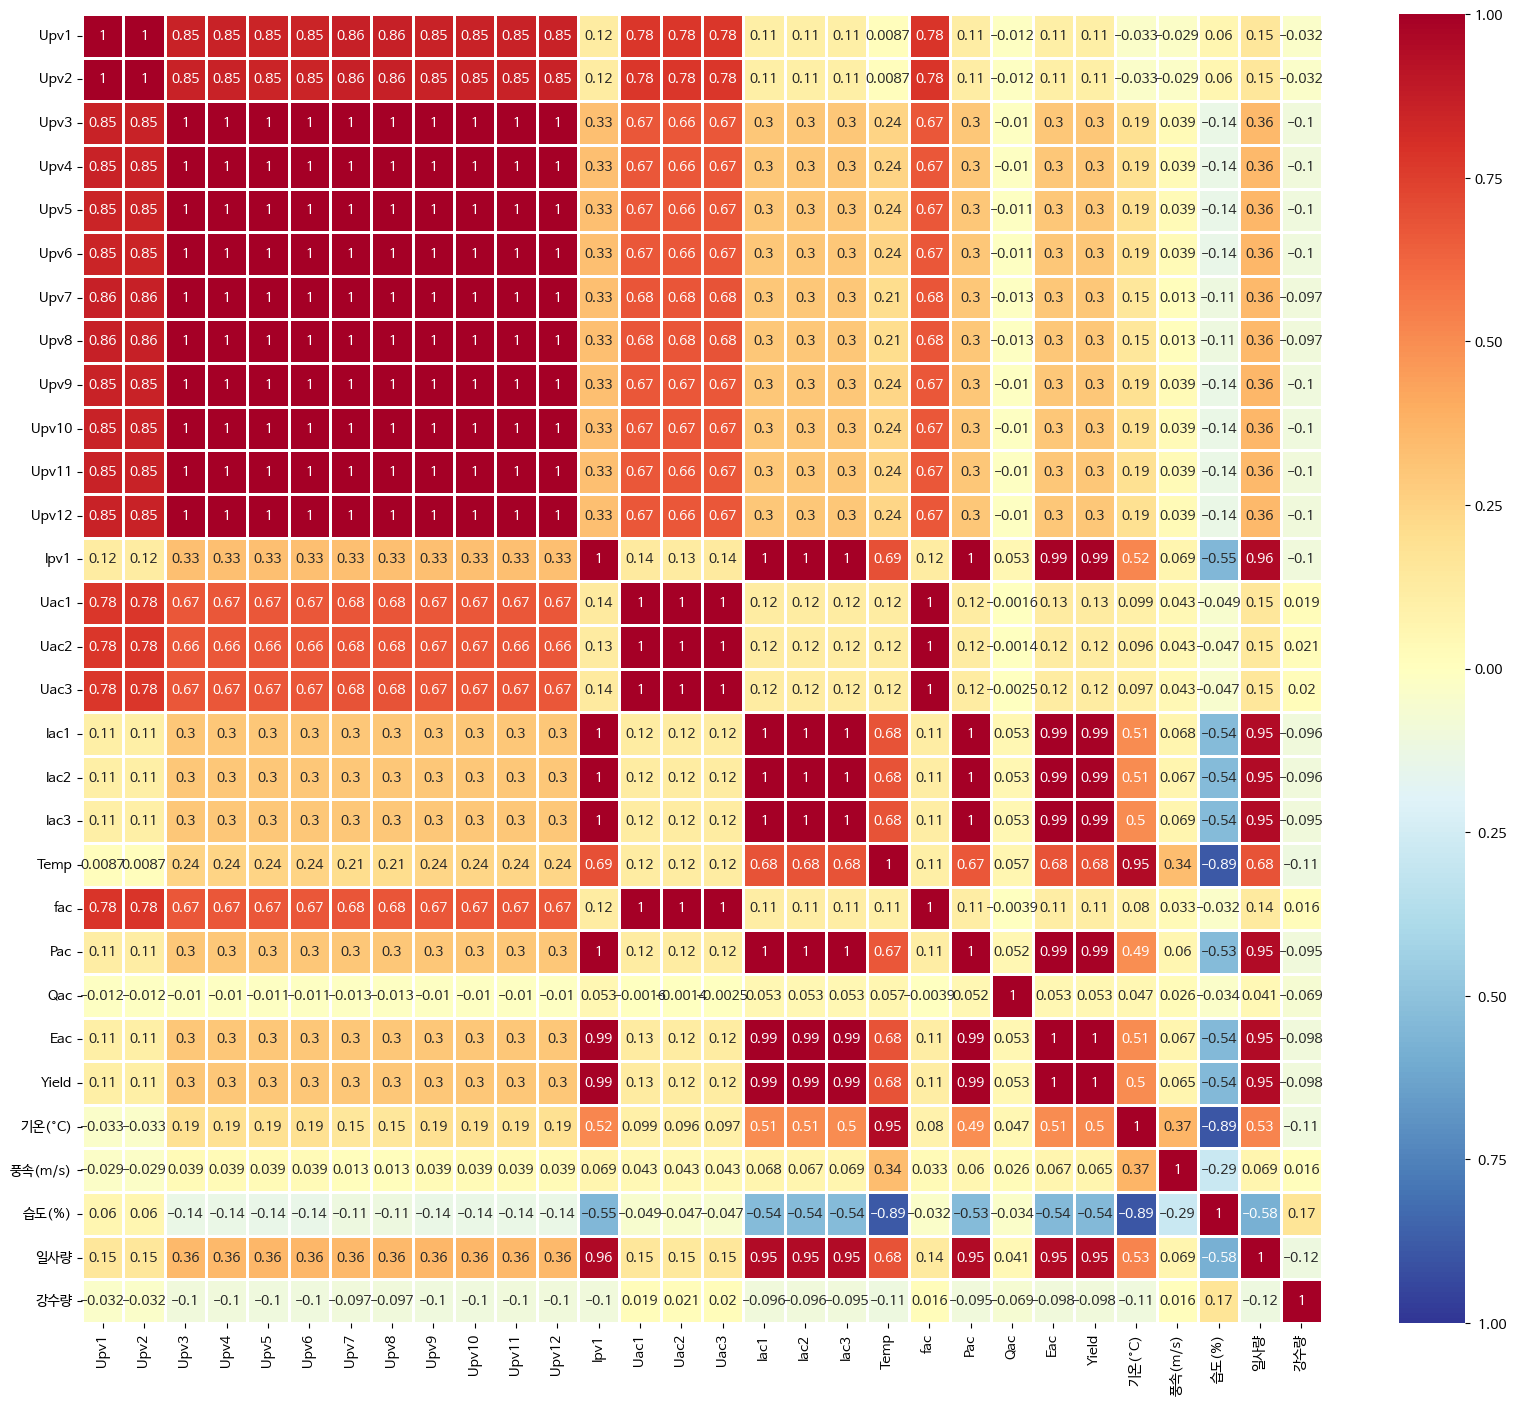

In [ ]:
plt.figure(figsize=(20, 17))

plt.rc('font', family = 'NanumBarunGothic')
sns.heatmap(df[corr_col].corr(),
            cmap = 'RdYlBu_r',
            annot = True,
            linewidths = 1,
            vmin = -1, vmax = 1)

In [ ]:
up_list = ['Yield', 'Upv1', 'Upv2', 'Upv3', 'Upv4', 'Upv5', 'Upv6', 'Upv7', 'Upv8', 'Upv9', 'Upv10', 'Upv11', 'Upv12']

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: title={'center': '<Yield & Upv Heatmap>'}>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


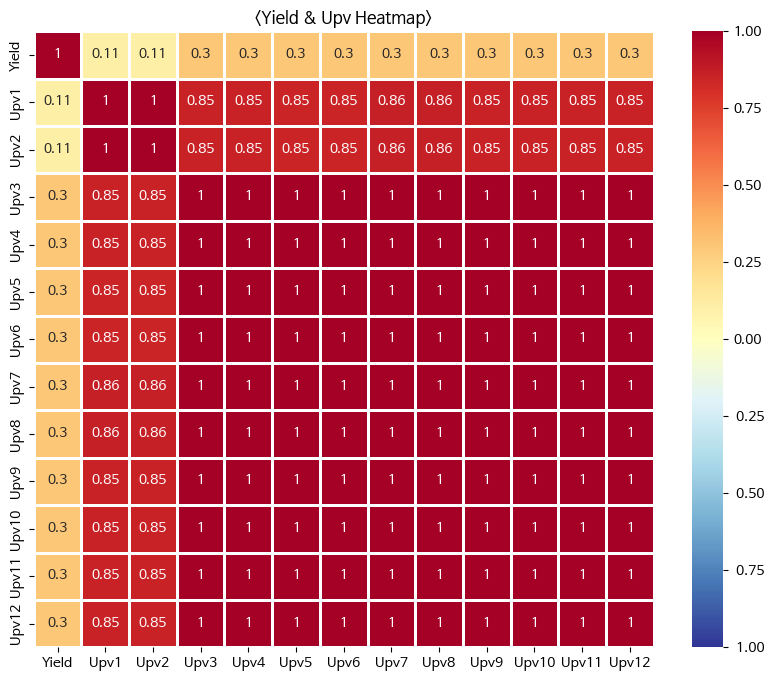

In [ ]:
plt.figure(figsize=(10, 8))

plt.title('<Yield & Upv Heatmap>')

plt.rc('font', family = 'NanumBarunGothic')
sns.heatmap(df[up_list].corr(),
            cmap = 'RdYlBu_r',
            annot = True,
            linewidths = 1,
            vmin = -1, vmax = 1)

In [ ]:
another_list = ['Yield', 'Ipv1', 'Uac1', 'Uac2', 'Uac3', 'Iac1', 'Iac2', 'Iac3', 'Temp', 'fac', 'Pac', 'Qac', 'Eac']

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: title={'center': '<Yield & Another Feature Heatmap>'}>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


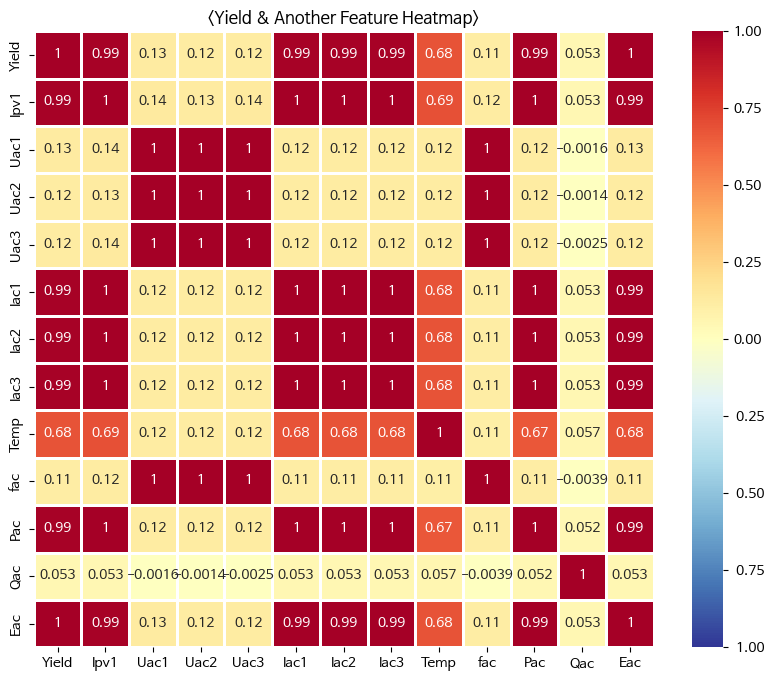

In [ ]:
plt.figure(figsize=(10, 8))

plt.title('<Yield & Another Feature Heatmap>')

plt.rc('font', family = 'NanumBarunGothic')
sns.heatmap(df[another_list].corr(),
            cmap = 'RdYlBu_r',
            annot = True,
            linewidths = 1,
            vmin = -1, vmax = 1)

In [ ]:
weather_list = ['Yield', '기온(°C)', '풍속(m/s)', '습도(%)', '일사량', '강수량']

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: title={'center': '<Yield & Weather Heatmap>'}>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


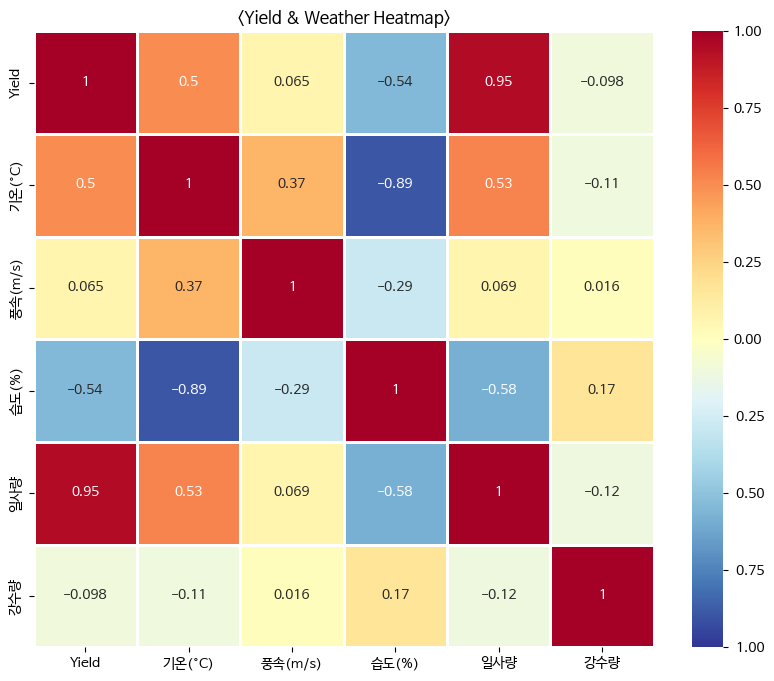

In [ ]:
plt.figure(figsize=(10, 8))

plt.title('<Yield & Weather Heatmap>')

plt.rc('font', family = 'NanumBarunGothic')
sns.heatmap(df[weather_list].corr(),
            cmap = 'RdYlBu_r',
            annot = True,
            linewidths = 1,
            vmin = -1, vmax = 1)

# PAC & 일사량 Correlation

<Axes: title={'center': '<Pac & 일사량 Correlation>'}, xlabel='Pac', ylabel='일사량'>

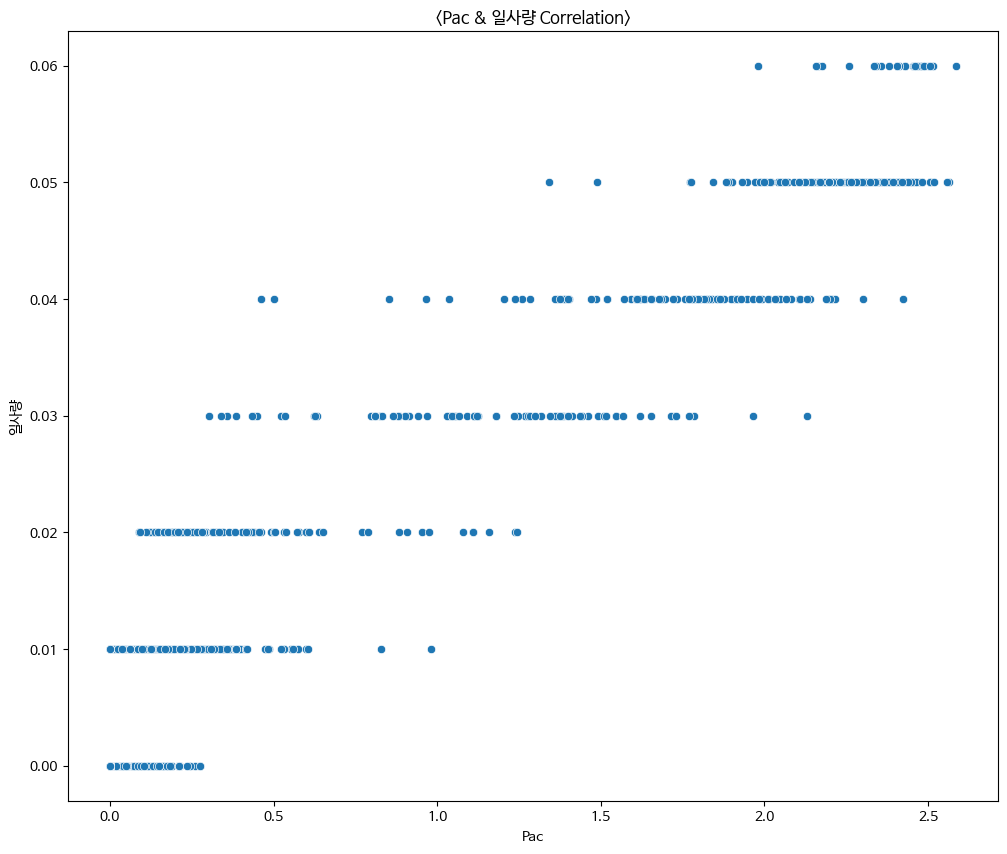

In [ ]:
plt.figure(figsize=(12, 10))

plt.title('<Pac & 일사량 Correlation>')

plt.rc('font', family = 'NanumBarunGothic')
sns.scatterplot(data=df, x='Pac', y='일사량')

In [ ]:
df[(df['일사량'] == 0) & (df['Pac'] != 0)]['Pac'].max()

0.275

In [ ]:
df[(df['일사량'] == 0) & (df['Yield'] != 0)][['#Time', 'Pac', 'Yield', '일사량']]

,#Time,Pac,Yield,일사량
70,24-04-17 07:05:00,0.016,0.01,0.0
73,24-04-17 07:20:00,0.079,0.01,0.0
208,24-04-17 18:35:00,0.000,0.01,0.0
361,24-04-18 17:55:00,0.019,0.01,0.0
517,24-04-19 17:25:00,0.117,0.01,0.0
522,24-04-19 17:50:00,0.085,0.01,0.0
564,24-04-20 08:15:00,0.004,0.01,0.0
577,24-04-20 09:20:00,0.025,0.01,0.0
581,24-04-20 09:40:00,0.046,0.01,0.0
583,24-04-20 09:50:00,0.077,0.01,0.0


In [ ]:
df['Yield'].max()

0.21000000000000085

- 일사량이 존재하지 않아도 주변 조명 또는 밝은 달빛에도 미비한 발전량을 가질 수 있음

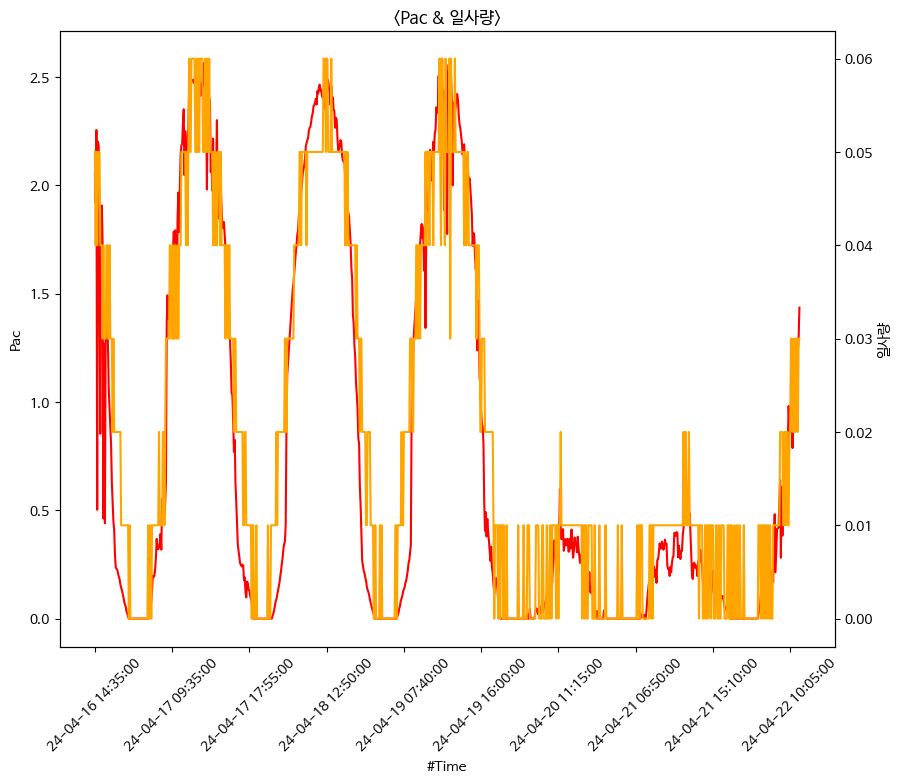

In [ ]:
plt.figure(figsize=(10,8))

plt.title('<Pac & 일사량>')

plt.xticks(np.arange(0, len(df), 100), rotation = 45)

ax = sns.lineplot(data=df, x='#Time', y='Pac', c='r')
ax2 = ax.twinx()
ax2 = sns.lineplot(data=df, x='#Time', y='일사량', c='orange', linestyle='-', ax=ax2)